In [2]:
from __future__ import division
import numpy as np
from numpy import fft
from scipy import signal, ndimage, misc, fftpack
import bitarray
import matplotlib.pyplot as plt
image_path = "Images/"
%matplotlib inline

In [10]:
imgB = ndimage.imread(image_path+'bird.jpg')
imgCal = ndimage.imread(image_path+'calBlue.tiff')


In [22]:
def getSurPix(loc, height, width):
    """
    returns the indices of the surrounding pixels
    input: loc = tuple containing the index of the pixel
    output: list of tuples of surrounding indices
    """
    up = None
    down = None
    left = None
    right = None
    out = []
    if loc[0] > 0:
        up = loc[0] - 1
    if loc[0] < height-1:
        down = loc[0] + 1
    if loc[1] > 0:
        left = loc[0] - 1
    if loc[1] < width-1:
        right = loc[0] - 1
    if up:
        out.append((up, loc[0]))
        if left:
            out.append((up, left))
        if right:
            out.append((up, right))
    if down:
        out.append((down, loc[0]))
        if left:
            out.append((down, left))
        if right:
            out.append((down, right))
    if left:
        out.append((loc[0], left))
    if right:
        out.append((loc[0], right))
    return out

In [ ]:
def reduceColors(img, dist):
    """
    Reduces similar colors from the image
    input:img = the image
          dist = the distance from the image to the 
    
    """
    h = len(img)
    w = len(img[0])
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            surr = getSurPix((i,j), h, w)
            surrV = img[surr]
            delta = surrV - img[(i, j)]
            norms = np.linalg.norm(delta, axis = 1)
            

[(1, 2), (1, 1), (1, 1), (3, 2), (3, 1), (3, 1), (2, 1), (2, 1)]

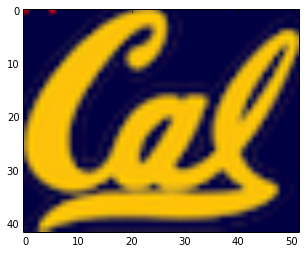

In [24]:
plt.imshow(imgCal)
getSurPix((2,2), 40, 40)

In [15]:
imgCal[0][5]=np.array([255,0,0])